In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
import scipy.io as io
dict1        = io.loadmat('drive/My Drive/test_folder/dict5000')
train_img    = dict1["train_img"]
train_labels = dict1["train_labels"]
test_img     = dict1["test_img"]
test_labels  = dict1["test_labels"]
val_img      = dict1["val_img"]
val_labels   = dict1["val_labels"]

In [0]:
import numpy as np
train_labels = train_labels.astype(np.int)
val_labels = val_labels.astype(np.int)
test_labels = test_labels.astype(np.int)

In [0]:
print("Shapes:")
print("Train:")
print(train_img.shape)
print("Val:")
print(val_img.shape)
print("Test:")
print(test_img.shape)

Shapes:
Train:
(5062, 96, 72, 3)
Val:
(534, 96, 72, 3)
Test:
(1212, 96, 72, 3)


In [0]:
import matplotlib.pyplot as plt

def plot_graph(results, param):
  vals = results.history["val_"+param]
  trains = results.history[param]
  plt.plot(range(1,len(vals)+1), vals, 'r--',label = "val")
  plt.plot(range(1,len(trains)+1), trains,'b--',label = "train")
  plt.legend()
  plt.show()

In [0]:
from keras.models import load_model
#Train Model
#Train model in 15 epochs with each epoch consisting of 128 batches.
def train_evaluate(model_fn, epoch,batch_size, verbose, train_img7, train_labels7, val_img7,val_labels7, test_img7, test_labels7):
  model = model_fn()
  model.save('model.h5')
  print("model name:",model," epoch:", epoch )
  if(val_img7 is None or val_labels7 is None):
    fitted = model.fit(train_img7, train_labels7, epochs=epoch, batch_size = batch_size, verbose =verbose,validation_split=0.4, shuffle=True)
  else:
    fitted = model.fit(train_img7, train_labels7, epochs=epoch, batch_size = batch_size, verbose =verbose,validation_data=(val_img7,val_labels7))

  #Test Model
  #Evaluate model on Train data
  train_loss, train_acc = model.evaluate(train_img7, train_labels7, verbose =verbose)
  print('train_acc:', train_acc)
  print('train_loss:', train_loss)

  #Evaluate model on Test data
  test_loss, test_acc = model.evaluate(test_img7, test_labels7, verbose =verbose)
  print('test_acc:', test_acc)
  print('train_loss:', test_loss)
  
  #Print graphs to select epoch size
  print("Acc Graphs:")
  plot_graph(fitted,"acc")
  print("Loss Graphs:")
  plot_graph(fitted,"loss")
  
  #Select epoch with best val acc
  vals = fitted.history["val_acc"][1:]
  e = vals.index(max(vals))+2
  print("Ideal epoch size should be:", e)
  
  #Train with train val combined on best epoch size
  tv_img7 = np.append(train_img7,val_img7,axis=0)
  tv_labels7 = np.append(train_labels7,val_labels7,axis=0)
#   reset_weights(model)
  model1 = load_model('model.h5')#model#model_fn()
#   model1.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
#   model1 = model
  print("Training on train, val combined on epoch size:",e)
  fitu1 = model1.fit( tv_img7, tv_labels7, epochs=e, batch_size = batch_size, verbose =1)
  
  print("Results after combining train,val on ideal epoch size:", e)
  #Test Model
  #Evaluate model on Train data
  train_loss1, train_acc1 = model1.evaluate(tv_img7, tv_labels7, verbose =1)
  print('train_acc:', train_acc1)
  print('train_loss:', train_loss1)

  #Evaluate model on Test data
  test_loss1, test_acc1 = model1.evaluate(r, test_labels, verbose =1)
  print('test_acc:', test_acc1)
  print('test_loss:', train_loss1)
  
  return model,model1

Using TensorFlow backend.


In [0]:
from keras import layers
from keras import models
from keras.optimizers import SGD
from keras.layers import LeakyReLU

def get_new_model():
  model5 = models.Sequential()
  model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 72,  3)))
  model5.add(layers.MaxPooling2D((2, 2)))
  model5.add(layers.Dropout(0.2))
  model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model5.add(layers.MaxPooling2D((2, 2)))
  model5.add(layers.Flatten())
  model5.add(layers.Dense(512, activation='relu'))
  model5.add(layers.Dense(1, activation='sigmoid'))
  model5.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
  print(model5.summary())
  return model5

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 35, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)  

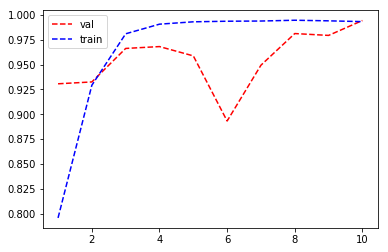

Loss Graphs:


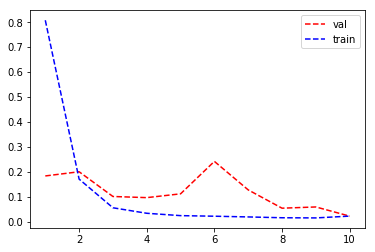

Ideal epoch size should be: 10
Training on train, val combined on epoch size: 10
Epoch 1/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.7087 - acc: 0.8147
Epoch 2/10
5596/5596 [==============================] - 5s 932us/step - loss: 0.1189 - acc: 0.9575
Epoch 3/10
5596/5596 [==============================] - 6s 988us/step - loss: 0.0495 - acc: 0.9846
Epoch 4/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.0371 - acc: 0.9889
Epoch 5/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.0279 - acc: 0.9925
Epoch 6/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.0228 - acc: 0.9943
Epoch 7/10
5596/5596 [==============================] - 6s 997us/step - loss: 0.0230 - acc: 0.9921
Epoch 8/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.0179 - acc: 0.9939
Epoch 9/10
5596/5596 [==============================] - 6s 1ms/step - loss: 0.0187 - acc: 0.9939
Epoch 10/10
5596/5596 [=================

(<keras.engine.sequential.Sequential at 0x7f7b6c909668>,
 <keras.engine.sequential.Sequential at 0x7f7b102c1cc0>)

In [0]:
p = train_img/255
q = val_img/255
r = test_img/255
# model1 = get_new_model()
# def train_evaluate(model_fn, epoch,batch_size, verbose, train_img7, train_labels7, val_img7,val_labels7, test_img7, test_labels7):
train_evaluate(get_new_model, 10, 128, 1, p, train_labels, q, val_labels, r, test_labels)